# Financial Time Series Project: Forecasting Daily Credit Card Transaction Volume

This project uses the credit card transaction dataset to build a time series forecasting model that predicts future transaction volume.


Forecast daily transaction volume for the next N days using historical credit card transaction data.



## Data Load and EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/credit risk

/content/drive/MyDrive/credit risk


In [2]:
import pandas as pd
import numpy as np
import holidays
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
import shap
import sklearn

In [5]:
credit_card = pd.read_csv('data/credit_card_transactions.csv')

In [6]:
credit_card

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [ ]:
credit_card.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,17972.0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,NaN
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,22644.0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,15236.0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,42442.0


In [ ]:
credit_card.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

In [ ]:
credit_card.shape

(1296675, 24)

In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Feature Engineering

In [7]:
credit_card['trans_date_trans_time'] = pd.to_datetime(credit_card['trans_date_trans_time'])
credit_card = credit_card.sort_values('trans_date_trans_time')

In [8]:
daily = (
    credit_card
    .set_index('trans_date_trans_time')
    .resample('D')
    .size()
    .rename('transaction_count')
    .to_frame()
)

In [9]:
daily

,transaction_count
trans_date_trans_time,
2019-01-01,2414
2019-01-02,1118
2019-01-03,1236
2019-01-04,1474
2019-01-05,1409
...,...
2020-06-17,1812
2020-06-18,2028
2020-06-19,2413


In [10]:

us_holidays = holidays.US(years=[2019, 2020])
daily['day_of_week'] = daily.index.dayofweek
daily['is_weekend'] = (daily['day_of_week'] >= 5).astype(int)
daily['month'] = daily.index.month
daily['is_holiday'] = daily.index.isin(us_holidays).astype(int)  # if you have a holiday list

/tmp/ipython-input-2704880156.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  daily['is_holiday'] = daily.index.isin(us_holidays).astype(int)  # if you have a holiday list


In [11]:
daily

,transaction_count,day_of_week,is_weekend,month,is_holiday
trans_date_trans_time,,,,,
2019-01-01,2414,1,0,1,1
2019-01-02,1118,2,0,1,0
2019-01-03,1236,3,0,1,0
2019-01-04,1474,4,0,1,0
2019-01-05,1409,5,1,1,0
...,...,...,...,...,...
2020-06-17,1812,2,0,6,0
2020-06-18,2028,3,0,6,0
2020-06-19,2413,4,0,6,0


Definition:

A lag feature is a shifted copy of a variable from an earlier time period. For example, if you have a price at time t, lag-1 would be the price at time t-1, lag-2 would be the price at time t-2, and so on.

Why Use Them:

- Capture temporal patterns: They help models learn how past values influence future outcomes
- Sequential dependencies: Useful when the current value depends on previous values (common in time series)
- Autoregressive modeling: They enable autoregressive models (like AR, ARIMA) where a variable is regressed on its own past values

In [12]:
# Creating lag features
#These features represent the value of the target variable from previous time steps.

daily['lag_1'] = daily['transaction_count'].shift(1)
daily['lag_7'] = daily['transaction_count'].shift(7)
daily['lag_30'] = daily['transaction_count'].shift(30)

In [13]:
# Creating rolling window features
# These features represent the moving average and moving standard deviation over specified window sizes.
daily['rolling_7'] = daily['transaction_count'].rolling(7).mean()
daily['rolling_30'] = daily['transaction_count'].rolling(30).mean()
# rolling standard deviation
daily['rolling_std_7'] = daily['transaction_count'].rolling(7).std()

## Training/Testing Split


In [14]:

train = daily.loc[:'2019-06-01']
test  = daily.loc['2019-06-02':]

X_train = train.drop('transaction_count', axis=1)
y_train = train['transaction_count']

X_test = test.drop('transaction_count', axis=1)
y_test = test['transaction_count']

### Benchmarks

In [15]:
# Naive forecast (lag-1)
# Using the previous day's value as the prediction for the current day
y_pred_naive = y_test.shift(1)

In [16]:
# Moving Average Forecast
# Using the average of the past 7 days as the prediction for the current day
y_pred_ma = train['transaction_count'].rolling(7).mean().iloc[-1]

## XGBoost Regressor Model



In [18]:


model = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror'
)


model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

## Evaluation

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:

mae_naive = mean_absolute_error(y_test[1:], y_pred_naive[1:])
rmse_naive = np.sqrt(mean_squared_error(y_test[1:], y_pred_naive[1:]))

print("Naive MAE:", mae_naive)
print("Naive RMSE:", rmse_naive)


Naive MAE: 580.9688311688311
Naive RMSE: 878.2578992883227


In [21]:
preds = model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 347.23052978515625
RMSE: 629.4893019345126


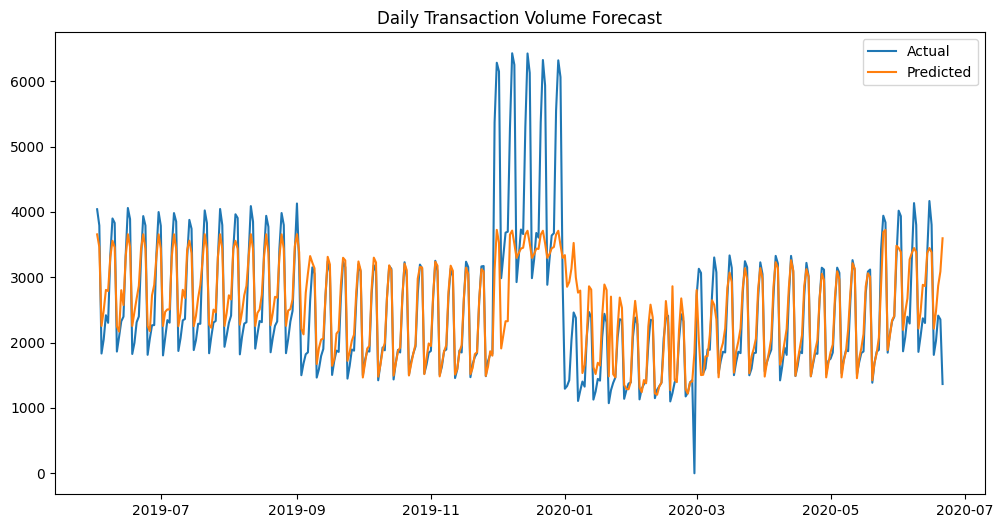

In [23]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, preds, label='Predicted')
plt.legend()
plt.title("Daily Transaction Volume Forecast")
plt.show()

**Model Performance Interpretation**

The XGBoost model achieves an MAE of 347 and an RMSE of 629 on the test set. This indicates that the model captures the overall structure of daily transaction volume but still struggles with larger spikes and dips, which is typical for financial time series. The gap between MAE and RMSE suggests the presence of occasional high‑variance days that the model underestimates or overestimates. Improvements such as adding holiday indicators, expanding rolling windows, and incorporating additional temporal features can further reduce forecasting error.


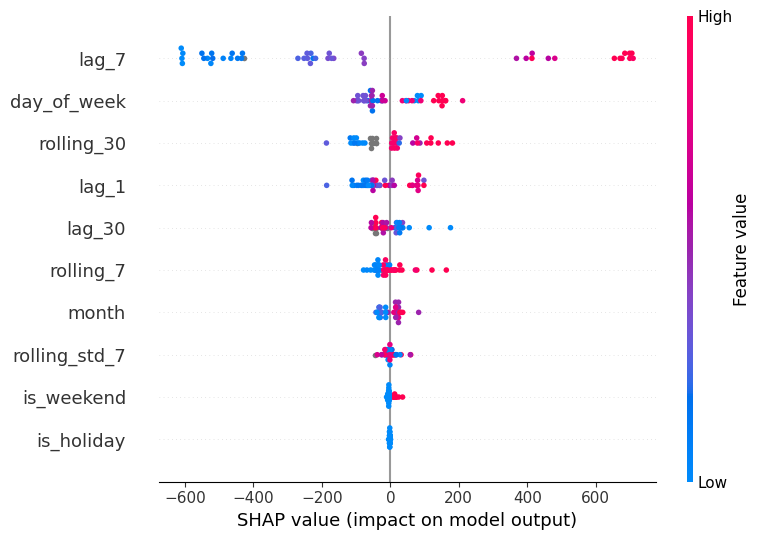

In [22]:
explainer = shap.TreeExplainer(model)
sample = X_train.sample(frac=0.3, random_state=42)
shap_values = explainer.shap_values(sample)
shap.summary_plot(shap_values, sample)

The SHAP analysis highlights the key drivers of the model’s predictions. Weekly seasonality emerges as the dominant signal, with lag_7 being the most influential feature. This indicates that transaction volume from the same day in the previous week strongly shapes today’s forecast.
Short‑term momentum features such as lag_1 and rolling_7 also contribute significantly, showing that recent behavior is predictive of near‑term activity. Longer‑term trends are captured through rolling_30, which helps the model adjust to structural shifts in customer behavior.
Calendar features like day_of_week, month, is_weekend, and is_holiday provide additional context, reinforcing the cyclical nature of transaction patterns. The distribution of SHAP values confirms that the model is learning meaningful, interpretable relationships rather than relying on noise.


The forecasting model successfully learns the temporal dynamics of credit card transaction volume, driven primarily by weekly seasonality and short‑term behavioral momentum. SHAP interpretability confirms that the model’s decisions align with intuitive business patterns, increasing confidence in its use for operational forecasting.
While the model performs well on regular patterns, incorporating holiday calendars, promotional events, or macroeconomic indicators would further improve accuracy during atypical periods. The combination of strong baseline performance, interpretability, and clear improvement paths makes this model a solid foundation for production‑level forecasting.